In [19]:
import requests
import pandas as pd
import datetime as dt
from power.ml_ops.data import get_pv_data, clean_pv_data
from power.ml_ops.model import model_yesterday
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [11]:
data = get_pv_data()
data_clean = clean_pv_data(data)

# data loaded
# data cleaned


In [15]:
def model_yesterday(X: pd.DataFrame, input_date: str) -> pd.DataFrame:
    """
    Returns a simple previous day model
    Input:
     - a clean DataFrame
     - a date with format: "YEAR-MONTH-DAY HOUR:MIN:SECONDS"
    Returns:
     - A dataFrame with the power production from the previous day
    """
    input_timestamp = pd.Timestamp(input_date, tz='UTC')
    idx = X[X.utc_time == input_timestamp].index[0]
    if idx <= 24:
        return X.iloc[0:idx,:]
    return X.iloc[idx-24:idx,:]


<Axes: >

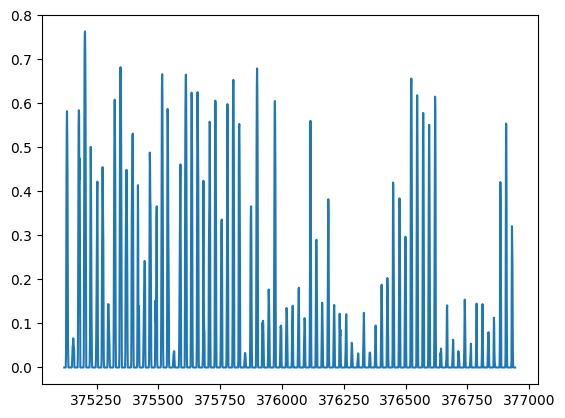

In [31]:
n_years = 5
reduced_idx = 365 * n_years
df = data_clean.iloc[-reduced_idx:,:]

df.get('electricity').plot()